In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = "./cleanjoineddata.csv"

df = pd.read_csv(file)
df.drop(
    [
        "profilepics3key",
        "countryoforigincode",
        "firstname",
        "lastname",
        "Number of Records",
        "ordinal",
        "breakdown",
    ],
    inplace=True,
    axis=1,
)

df.head(5)

,affiliatename,countryoforiginname,competitorname,division,status,gender,height,affiliateid,weight,bibid,...,age,overallrank,overallscore,lane,rank,heat,points,scoredisplay,time,workoutrank
0,CrossFit Mayhem,United States,Mathew Fraser,Men,ACT,M,1.74,44632.0,88.5,16,...,29,1,984.0,26,1,3,100,0.010505787,0.010505787,1
1,Peak 360 CrossFit,United States,Noah Ohlsen,Men,ACT,M,1.74,44800.0,86.2,302,...,28,2,949.0,46,16,3,70,0.011830324,0.011830324,16
2,CrossFit Hengill,Iceland,BjÃ¶rgvin Karl GuÃ°mundsson,Men,ACT,M,1.55,44753.0,83.9,122,...,26,3,888.0,25,4,3,94,0.011209606,0.011209606,4
3,CrossFit Mentality,United States,Scott Panchik,Men,ACT,M,1.80,44597.0,84.8,105,...,31,4,795.0,21,3,3,96,0.011179977,0.011179977,3
4,CrossFit Mode,Australia,James Newbury,Men,ACT,M,1.55,44792.0,87.1,303,...,28,5,728.0,31,6,2,90,0.011356366,0.011356366,6


In [4]:
cat_cols = df.select_dtypes(exclude="number")
num_cols = df.select_dtypes(include="number")

cat_cols_lst = cat_cols.columns.tolist()
num_cols_lst = num_cols.columns.to_list()

print(
    f"categorical columns are : {cat_cols_lst}\nnumerical columns are : {num_cols_lst}"
)

# Summarize dataset
print("Dataset summary:")
print(df.describe())
print("\nData Types:")
print(df.dtypes)

categorical columns are : ['affiliatename', 'countryoforiginname', 'competitorname', 'division', 'status', 'gender', 'bibid', 'overallrank', 'rank', 'scoredisplay', 'time', 'workoutrank']
numerical columns are : ['height', 'affiliateid', 'weight', 'competitorid', 'age', 'overallscore', 'lane', 'heat', 'points']
Dataset summary:
           height   affiliateid      weight  competitorid         age  \
count  394.000000    357.000000  394.000000  3.940000e+02  394.000000   
mean     1.655787  44757.523810   74.375127  4.017464e+05   34.535533   
std      0.255454    112.934443   12.188398  3.700666e+05   10.900195   
min      0.030000  44588.000000   50.800000  1.690000e+03   17.000000   
25%      1.580000  44659.000000   64.000000  1.093408e+05   27.000000   
50%      1.710000  44740.000000   73.000000  2.793440e+05   30.000000   
75%      1.770000  44858.000000   86.075000  6.381898e+05   40.000000   
max      1.950000  44977.000000  102.100000  1.697328e+06   63.000000   

       overa

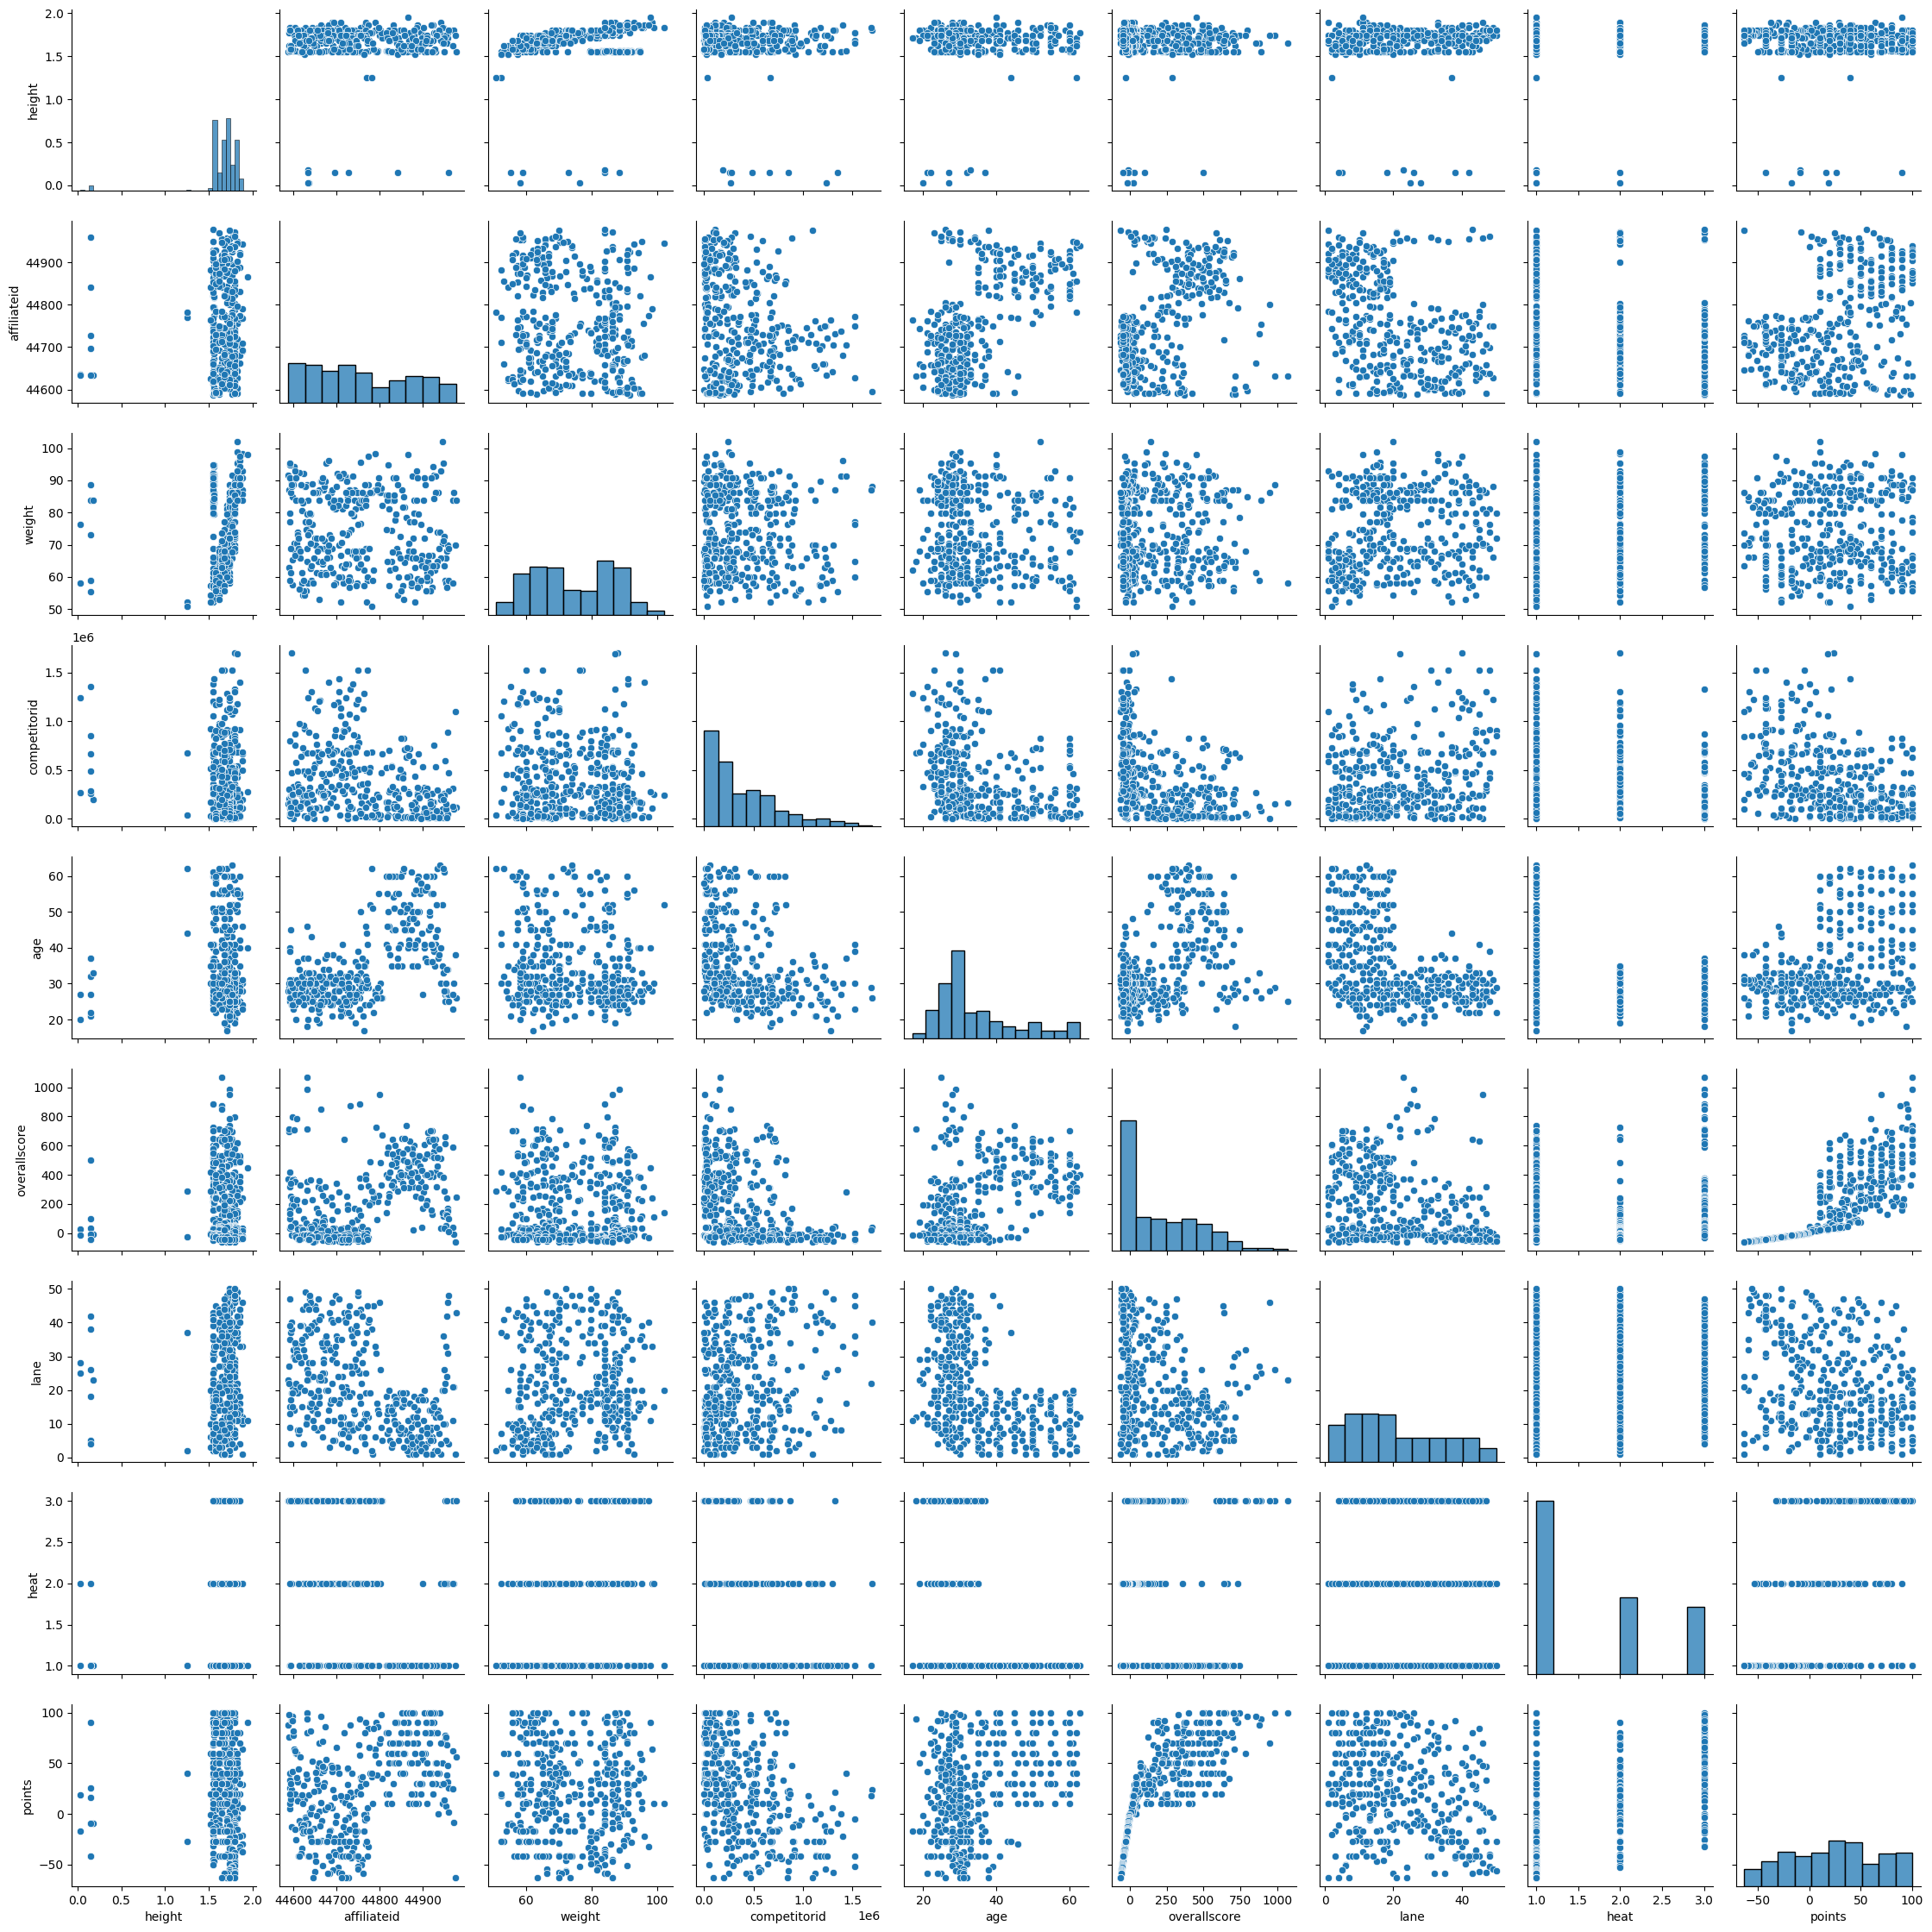

In [5]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

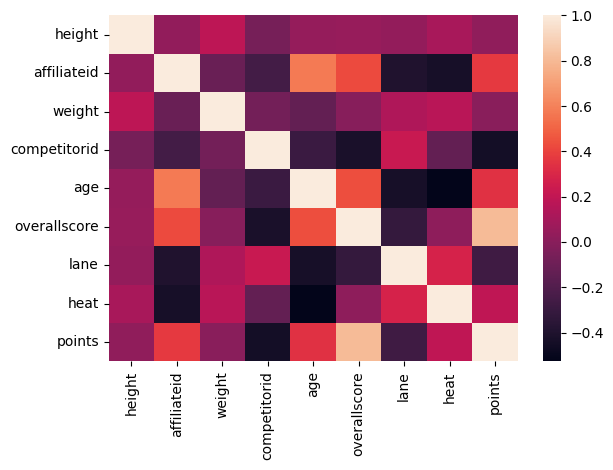

In [6]:
# num_cols = num_cols.drop(["affiliateid", "competitorid"],axis=1)

sns.heatmap(num_cols.corr())
plt.tight_layout()
plt.show()

TypeError: annotate() missing 1 required positional argument: 'xy'

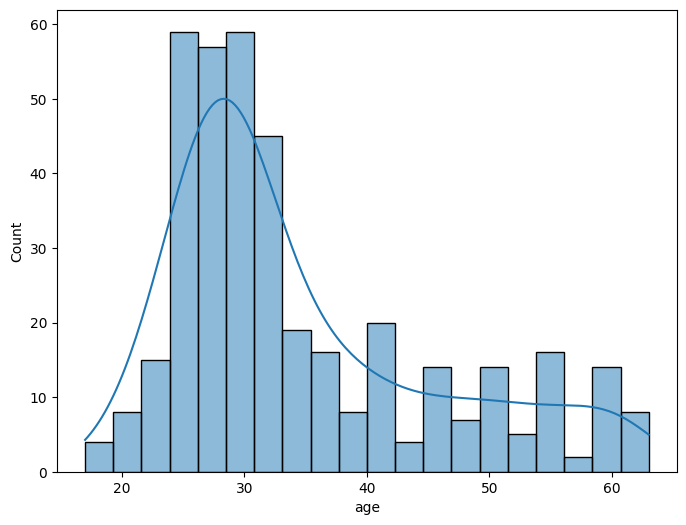

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt
cleaned_data = df
# Perform basic EDA

# Distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data["age"], bins=20, kde=True)
plt.annotate(cleaned_data["age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = num_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Boxplot of height vs weight
plt.figure(figsize=(8, 6))
sns.boxplot(x="gender", y="weight", data=cleaned_data)
plt.title("Weight Distribution by Gender")
plt.show()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

data = df
# Select features and target
X = data[["age", "height", "weight"]]  # Modify feature set as needed
y = data["points"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR(kernel="linear"),
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)

    results[name] = {"MSE": mse, "RMSE": rmse, "R²": r2}

# Display results
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print(f"R²: {metrics['R²']}")

best_model = max(results, key=lambda model: results[model]["R²"])

# Print the best model and its performance
print(f"\nBest Model: {best_model}")
print(f"MSE: {results[best_model]['MSE']}")
print(f"RMSE: {results[best_model]['RMSE']}")
print(f"R²: {results[best_model]['R²']}")


Linear Regression:
MSE: 1747.8484941499462
RMSE: 41.807278004552586
R²: 0.07911271226440786

Decision Tree:
MSE: 3342.5798319327732
RMSE: 57.81504849027434
R²: -0.7611018836991899

Random Forest:
MSE: 2191.308790194445
RMSE: 46.8114173059783
R²: -0.15453279568990275

Gradient Boosting:
MSE: 1926.8026000087345
RMSE: 43.895359663735924
R²: -0.01517266871971179

SVR:
MSE: 1781.3832011125446
RMSE: 42.20643554142596
R²: 0.061444312833246584


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer  # For handling missing values

# Load the dataset
data = df

# Define categorical and numerical columns
categorical_cols = [
    "affiliatename",
    "countryoforiginname",
    "competitorname",
    "division",
    "status",
    "gender",
    "bibid",
    "overallrank",
    "rank",
    "scoredisplay",
    "time",
    "workoutrank",
]
numerical_cols = [
    "height",
    "affiliateid",
    "weight",
    "competitorid",
    "age",
    "overallscore",
    "lane",
    "heat",
    "points",
]

# Define target
target_column = "points"
X = data[categorical_cols + numerical_cols]
y = data[target_column]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Preprocessing for categorical columns with missing values handling
categorical_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="most_frequent"),
        ),  # Fill missing values with the most frequent value
        (
            "onehot",
            OneHotEncoder(handle_unknown="ignore"),
        ),  # One-hot encode categorical variables
    ]
)

# Preprocessing for numerical columns with missing values handling
numerical_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="mean"),
        ),  # Fill missing values with the mean
        ("scaler", StandardScaler()),  # Standardize numerical variables
    ]
)

# Combine the preprocessing steps for both categorical and numerical columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

# Define the model (Random Forest for this example)
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),  # Apply preprocessing
        ("regressor", RandomForestRegressor(n_estimators=100, random_state=42)),
    ]
)

# Train the model
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Performance:\nMSE: {mse}\nRMSE: {rmse}\nR²: {r2}")

Random Forest Model Performance:
MSE: 0.8201815126050425
RMSE: 0.9056387318379456
R²: 0.9995678717399582


In [12]:
# Example of manual input (replace values with actual input values)
manual_input = pd.DataFrame(
    {
        "affiliatename": ["SampleAffiliate"],
        "countryoforiginname": ["CountryX"],
        "competitorname": ["CompetitorY"],
        "division": ["SampleDivision"],
        "status": ["Active"],
        "gender": ["M"],
        "bibid": [101],
        "overallrank": [1],
        "rank": [1],
        "scoredisplay": ["ScoreX"],
        "time": ["00:20:00"],
        "workoutrank": [1],
        "height": [180],
        "affiliateid": [1001],
        "weight": [75],
        "competitorid": [1234],
        "age": [25],
        "overallscore": [900],
        "lane": [3],
        "heat": [2],
        "points": [
            500
        ],  # Replace 'points' with the correct column name for manual prediction
    }
)

# Apply the same preprocessing as used for training
manual_prediction = model.predict(manual_input)

print(f"Manual Prediction: {manual_prediction}")

Manual Prediction: [97.84]


In [13]:
errors = y_test - y_pred
print("Prediction Errors (y_test - y_pred):")
print(errors)

Prediction Errors (y_test - y_pred):
78     1.48
275   -1.41
247   -0.25
55     0.46
389   -0.02
       ... 
280    0.07
354    0.00
249    0.12
153   -0.31
109   -0.30
Name: points, Length: 119, dtype: float64


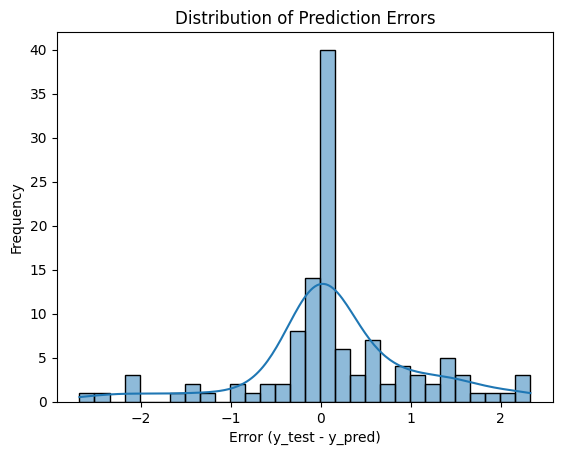

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(errors, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (y_test - y_pred)")
plt.ylabel("Frequency")
plt.show()

                  Feature  Importance
8                  points    0.934539
5            overallscore    0.064712
1             affiliateid    0.000040
4                     age    0.000040
3            competitorid    0.000039
0                  height    0.000033
6                    lane    0.000032
1323        workoutrank_1    0.000027
2                  weight    0.000024
1165  scoredisplay_CAP+30    0.000020


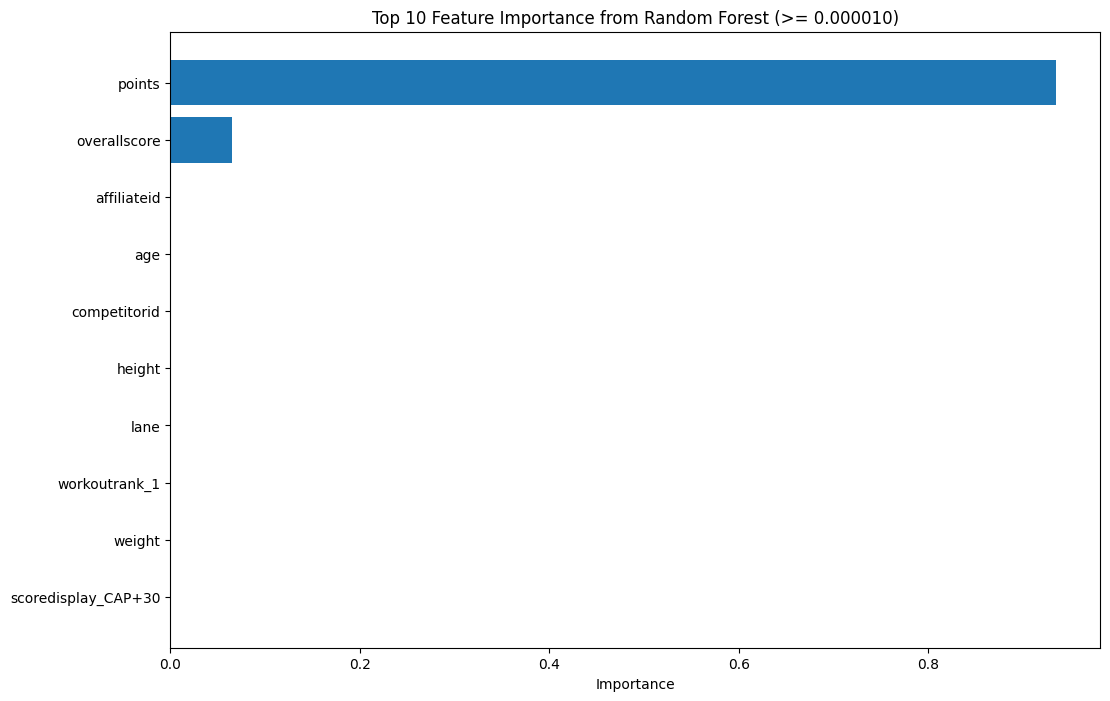

In [18]:
# Get the feature names after transformation
feature_names = (
    list(preprocessor.named_transformers_["num"].get_feature_names_out())
    + preprocessor.named_transformers_["cat"].get_feature_names_out().tolist()
)

# Get feature importance from the Random Forest model
feature_importances = model.named_steps["regressor"].feature_importances_

# Combine feature names and their importance
feature_importance_df = pd.DataFrame(
    {"Feature": feature_names, "Importance": feature_importances}
)

# Filter out features with very low importance (below 0.000010)
filtered_df = feature_importance_df[feature_importance_df["Importance"] >= 0.000010]

# Sort the remaining features by importance and select the top 10
top_10_features = filtered_df.sort_values(by="Importance", ascending=False).head(10)

# Display the filtered feature importance (top 10)
print(top_10_features)

# Plot feature importance (top 10)
plt.figure(figsize=(12, 8))
plt.barh(top_10_features["Feature"], top_10_features["Importance"])
plt.title("Top 10 Feature Importance from Random Forest (>= 0.000010)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()  # Invert axis to display the most important feature on top
plt.show()

Most Successful Lanes (Ranked by Average Points):
lane
22    55.666667
23    47.500000
5     45.090909
4     43.636364
16    43.583333
15    42.750000
25    41.000000
10    40.750000
2     40.375000
26    39.333333
14    37.583333
17    33.583333
12    31.750000
27    31.500000
11    30.500000
6     29.416667
8     27.916667
18    27.833333
31    26.666667
20    26.363636
9     26.250000
33    26.166667
29    25.166667
7     23.583333
3     23.555556
19    23.333333
28    20.500000
13    17.666667
1     15.750000
35    13.666667
21    13.166667
38    13.166667
32    12.500000
46    12.000000
36    11.500000
30    10.833333
24     8.333333
45     4.833333
44     4.166667
41     3.666667
43     3.333333
47    -0.600000
40    -2.833333
42    -2.833333
37    -3.666667
39    -9.666667
34   -13.500000
49   -28.500000
48   -33.000000
50   -41.500000
Name: points, dtype: float64


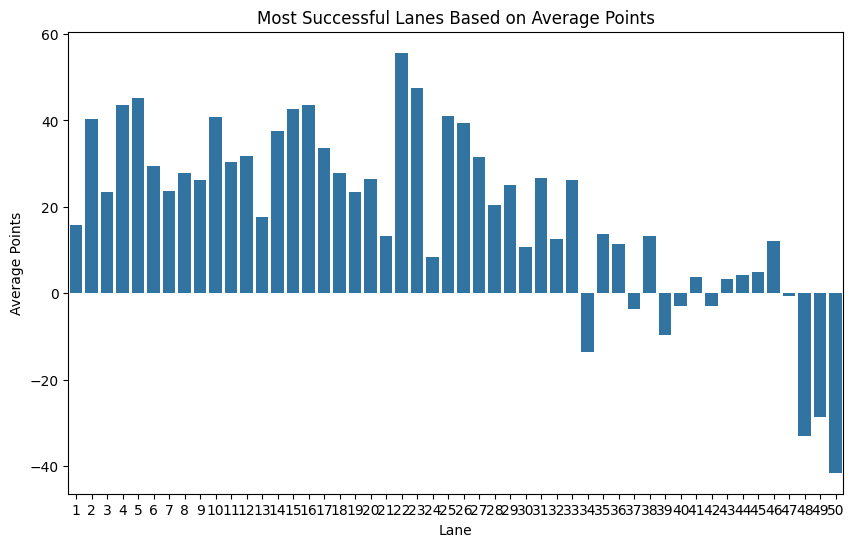

In [17]:
# Analyze the most successful lane based on the 'points' column
most_successful_lane = df.groupby("lane")["points"].mean().sort_values(ascending=False)
print("Most Successful Lanes (Ranked by Average Points):")
print(most_successful_lane)

# Plot the results for visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=most_successful_lane.index, y=most_successful_lane.values)
plt.title("Most Successful Lanes Based on Average Points")
plt.xlabel("Lane")
plt.ylabel("Average Points")
plt.show()